In [1]:
import pandas as pd
import numpy as np
from random import randint

## Step 1: Getting Data Ready

In [2]:
# Storing dataset into a Pandas DataFrame
heart_disease_df = pd.read_csv("datasets/heart-disease.csv")

In [3]:
# Printing head of DataFrame to make sure the data has been loaded correctly
heart_disease_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Using Random seed to make results reproducible:
np.random.seed(42)
# Creating X & Y, where:
# X: Feature columns in DataFrame (whatever is needed for predicting)
# Y: Column to be predicted
X = heart_disease_df.drop('target',axis = 1)
Y = heart_disease_df['target']

### Splitting dataset into train, validation, and test sets using the train_test_split method twice:

In [5]:
from sklearn.model_selection import train_test_split
# Splitting dataset into train, validation, and test sets using the train_test_split method twice:

X_train_valid,X_test,Y_train_valid,Y_test = train_test_split(X,Y,test_size = 0.2)

In [6]:
X_train,X_valid,Y_train,Y_valid = train_test_split(X_train_valid,Y_train_valid,train_size = 0.7)

In [7]:
# Looking at shapes to ensure that the dataset was split properly:
X_train.shape,Y_train.shape,X_valid.shape,Y_valid.shape,X_test.shape,Y_test.shape

((169, 13), (169,), (73, 13), (73,), (61, 13), (61,))

## Step 2: Choosing the Model
Done by following the Model Selection Map. In this example, it's a Classification problem.
<br>This step involves trying different models.
<br>RandomForestClassifier from sklearn.ensemble is used.

In [8]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

## Step 3: Fitting Model to Data & Making Predictions

In [9]:
# Fitting training data to model using fit () method
model.fit(X_train, Y_train)

RandomForestClassifier()

Instantiating Calibration Model:

In [10]:
from sklearn.calibration import CalibratedClassifierCV
cal_model = CalibratedClassifierCV(model,method="sigmoid",cv=5)

In [11]:
# Fitting validation dataset to calibration model using fit () method
cal_model.fit(X_valid, Y_valid)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(), cv=5)

In [12]:
# Making predictions using predict() method:
Y_pred = model.predict(X_test)
Y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [13]:
Y_cal_pred = cal_model.predict(X_test)
Y_cal_pred

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [14]:
# Making predictions using predict_proba() method:
Y_prob_pred = model.predict_proba(X_test)
Y_prob_pred[:10]

array([[0.78, 0.22],
       [0.44, 0.56],
       [0.39, 0.61],
       [0.92, 0.08],
       [0.17, 0.83],
       [0.25, 0.75],
       [0.18, 0.82],
       [0.95, 0.05],
       [0.95, 0.05],
       [0.51, 0.49]])

In [15]:
# Making predictions using predict_proba() method:
Y_prob_cal_pred = cal_model.predict_proba(X_test)
Y_prob_cal_pred[:10]

array([[0.86397489, 0.13602511],
       [0.35318614, 0.64681386],
       [0.36572344, 0.63427656],
       [0.80108322, 0.19891678],
       [0.41853022, 0.58146978],
       [0.11816887, 0.88183113],
       [0.52455953, 0.47544047],
       [0.85274099, 0.14725901],
       [0.83784023, 0.16215977],
       [0.38781564, 0.61218436]])

## Step 4: Evaluating Model

### 4.1: Using `score()` method:

In [16]:
# Perform .score on train set first:
model.score(X_train, Y_train)

1.0

In [17]:
# Perform .score on test set:
model.score(X_test, Y_test)

0.8360655737704918

### 4.2: Using **Scoring** parameters:

#### a) Cross-Validation Accuracy:

In [18]:
from sklearn.model_selection import cross_val_score
# 5-fold Cross-val score: 
cv_score_array = cross_val_score(model, X, Y, cv=5)
print("CV Accuracy for Uncalibrated Model = " + str (np.mean(cv_score_array)))
cv_score_array = cross_val_score(cal_model, X, Y, cv=5)
print("CV Accuracy for Calibrated Model = " + str (np.mean(cv_score_array)))

CV Accuracy for Uncalibrated Model = 0.8315300546448088
CV Accuracy for Calibrated Model = 0.8249726775956285


#### b) Area Under the Curve (AUC/ROC):
- `predict_proba()` is used for this metric

In [19]:
# Finding Prediction Probability:
Y_probs_pred = model.predict_proba(X_test)
Y_prob_cal_pred = cal_model.predict_proba(X_test)

In [20]:
# Left column represents probability of prediction being *False* while right column represents probability of prediction being *True*
Y_positive = Y_probs_pred[:,1]

Y_positive_cal = Y_prob_cal_pred[:,1]

##### Calculating FPR, TPR,and Thresholds:

In [21]:
# Importing roc_curve:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(Y_test,Y_positive)

fpr_cal,tpr_cal,thresholds_cal = roc_curve(Y_test,Y_positive_cal)

##### Plotting function

In [22]:
import matplotlib.pyplot as plt
def plot_roc_curve(fpr,tpr,fpr_cal,tpr_cal):
    """ Plots ROC Curve given False Positive Right (FPR) & True Positive Right (TPR)"""
    
    # Plot Uncalibrated ROC Curve:
    plt.plot(fpr, tpr, color = "orange", label = "ROC")
    
    # Plot Calibrated ROC Curve:
    plt.plot(fpr_cal, tpr_cal, color = "m", label = "ROC")
    
    #Plot baseline:
    plt.plot([0,1],[0,1], color = "darkblue", linestyle = "--", label = "Guessing")
    
    # Customizing Plot:
    plt.xlabel = "FPR"
    plt.ylabel = "TPR"
    plt.title = "ROC Curve"
    plt.legend()
    plt.show()

    

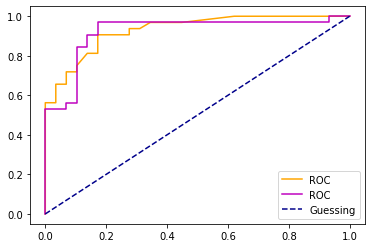

In [23]:
plot_roc_curve(fpr,tpr,fpr_cal,tpr_cal)

- ROC Scores

In [24]:
from sklearn.metrics import roc_auc_score
print("ROC for uncalibrated Model: " + str(roc_auc_score(Y_test,Y_positive)))
print("ROC for calibrated Model: " + str(roc_auc_score(Y_test,Y_positive_cal)))

ROC for uncalibrated Model: 0.9299568965517241
ROC for calibrated Model: 0.9202586206896552


##### Confusion Matrix:
- Also known as an **Error Matrix**.
- Quick way to compare a model's **predicted labels** with the **actual labels** it was supposed to predict.
- Not strictly used for **binary classification** problems.
- Gives you an idea where the model gets confused.

##### Visualizing Confusion Matrix using `sklearn.ConfusionMatrixDisplay`:
1. From Estimator (includes training & validation sets).
2. From Predictions (only includes test set).

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay

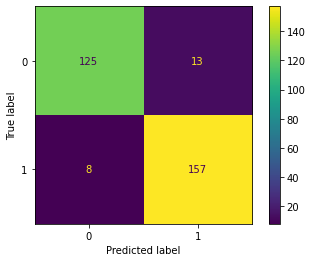

In [26]:
# Using from_predictions - Uncalibrated Model:
ConfusionMatrixDisplay.from_estimator(estimator = model, X= X, y=Y)

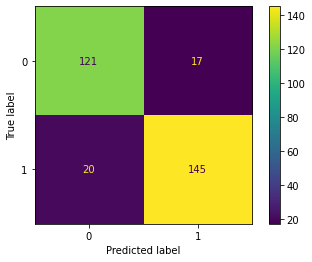

In [27]:
# Using from_predictions - Calibrated Model:
ConfusionMatrixDisplay.from_estimator(estimator = cal_model, X= X, y=Y)

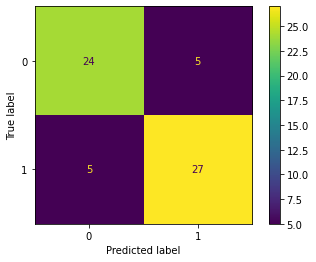

In [28]:
# Using from_predictions - Uncalibrated Model:
ConfusionMatrixDisplay.from_predictions(y_true = Y_test, y_pred = Y_pred)

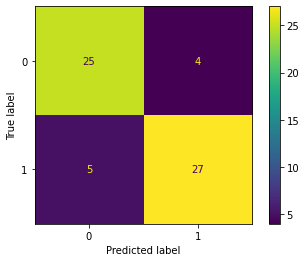

In [29]:
# Using from_predictions - Calibrated Model:
ConfusionMatrixDisplay.from_predictions(y_true = Y_test, y_pred = Y_cal_pred)

### Classification Report:

#### For Uncalibrated Model:

In [30]:
from sklearn.metrics import classification_report
print (classification_report(Y_test,Y_pred))


              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



#### For Calibrated Model:

In [31]:
from sklearn.metrics import classification_report
print (classification_report(Y_test,Y_cal_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



## Step 5: Improving Model


In [32]:
# Try different numbers of estimators with cross-validation and no cross-validation

from sklearn.model_selection import cross_val_score

for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    model = RandomForestClassifier(n_estimators=i).fit(X_train, Y_train)
    print(f"Model accruacy on test set: {model.score(X_test, Y_test)}")
    print(f"Cross-validation score: {np.mean(cross_val_score(model, X, Y, cv=5)) * 100}%")
    print("")

Trying model with 10 estimators...
Model accruacy on test set: 0.8360655737704918
Cross-validation score: 79.20218579234972%

Trying model with 20 estimators...
Model accruacy on test set: 0.8688524590163934
Cross-validation score: 82.15300546448088%

Trying model with 30 estimators...
Model accruacy on test set: 0.9016393442622951
Cross-validation score: 80.83606557377048%

Trying model with 40 estimators...
Model accruacy on test set: 0.819672131147541
Cross-validation score: 80.83060109289617%

Trying model with 50 estimators...
Model accruacy on test set: 0.8524590163934426
Cross-validation score: 83.47540983606557%

Trying model with 60 estimators...
Model accruacy on test set: 0.8360655737704918
Cross-validation score: 81.49726775956283%

Trying model with 70 estimators...
Model accruacy on test set: 0.8524590163934426
Cross-validation score: 80.5191256830601%

Trying model with 80 estimators...
Model accruacy on test set: 0.8688524590163934
Cross-validation score: 83.15300546448

## Step 6: Saving Trained Model

In [ ]:
import pickle

# Save trained model to file
pickle.dump(model, open("random_forest_model_1.pkl", "wb"))